# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [1]:
import pandas as pd

## Regression Model Evaluation

In [2]:
from sklearn.datasets import load_boston

data = load_boston()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=['MEDV'])

data = pd.concat([X, y], axis=1)

C:\Users\mfran\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [3]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [4]:
data.columns
X= data[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT']]
Y= data.MEDV
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (404, 13) (404, 1)
Test set: (102, 13) (102, 1)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [5]:
from sklearn.linear_model import LinearRegression
LR= LinearRegression()

In [6]:
LR.fit(X_train, y_train)
LR_pre= LR.predict(X_test)
LR_pre

array([[12.07495986],
       [26.9894969 ],
       [17.58803353],
       [18.15584511],
       [36.92091659],
       [25.43267386],
       [31.09256932],
       [19.72549907],
       [19.66103377],
       [22.96358632],
       [28.38841214],
       [28.48925986],
       [18.99690357],
       [32.41097504],
       [21.52350275],
       [15.25945122],
       [21.23364112],
       [11.6220597 ],
       [11.37109662],
       [13.63515584],
       [ 5.62431971],
       [17.35323315],
       [20.80951594],
       [22.51311312],
       [16.39055556],
       [20.32352451],
       [17.88994185],
       [14.23445109],
       [21.1187098 ],
       [17.50765806],
       [14.54295525],
       [23.63289896],
       [34.32419647],
       [22.23027161],
       [16.82396516],
       [20.16274383],
       [30.67665825],
       [35.61882904],
       [23.50372003],
       [24.66451121],
       [36.91269871],
       [32.33290254],
       [19.11785719],
       [32.19546605],
       [33.42795148],
       [25

## 3. Calculate and print R-squared for both the training and the testing set.

In [7]:
from sklearn.metrics import r2_score
r2_score(y_test,LR_pre)

0.7263451459702515

## 4. Calculate and print mean squared error for both the training and the testing set.

In [8]:
training_set= X_train, y_train
test_set= X_test, y_test
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, LR_pre)

25.4195871268218

## 5. Calculate and print mean absolute error for both the training and the testing set.

In [9]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, LR_pre )

3.36779098379658

## Classification Model Evaluation

In [10]:
from sklearn.datasets import load_iris

data = load_iris()

X = pd.DataFrame(data["data"], columns=data["feature_names"])
y = pd.DataFrame(data["target"], columns=["class"])

data = pd.concat([X, y], axis=1)

## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [13]:
data.columns
X= data[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)']]
Y= data['class']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)

## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [14]:
from sklearn.linear_model import LogisticRegression
LogR= LogisticRegression( max_iter= 2000, solver='liblinear')
LogR.fit(X_train, y_train)
LogR_pre= LogR.predict(X_test)
LogR_pre


C:\Users\mfran\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2])

## 8. Calculate and print the accuracy score for both the training and the testing set.

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, LogR_pre)

0.9333333333333333

## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [18]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, LogR_pre)

0.8962962962962964

## 10. Calculate and print the precision score for both the training and the testing set.

In [19]:
from sklearn.metrics import precision_score
precision_score(y_test, LogR_pre, average= 'micro')

0.9333333333333333

## 11. Calculate and print the recall score for both the training and the testing set.

In [20]:
from sklearn.metrics import recall_score
recall_score(y_test, LogR_pre, average= 'micro')

0.9333333333333333

## 12. Calculate and print the F1 score for both the training and the testing set.

In [21]:
from sklearn.metrics import f1_score
f1_score(y_test, LogR_pre, average= 'micro')
y_test

,class
128,2
18,0
130,2
105,2
107,2
78,1
83,1
14,0
5,0
133,2


## 13. Generate confusion matrices for both the training and the testing set.

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, LogR_pre)

array([[16,  0,  0],
       [ 0,  4,  1],
       [ 0,  1,  8]], dtype=int64)

In [23]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [24]:
import numpy as np


Confusion matrix, without normalization
[[16  0  0]
 [ 0  4  1]
 [ 0  1  8]]


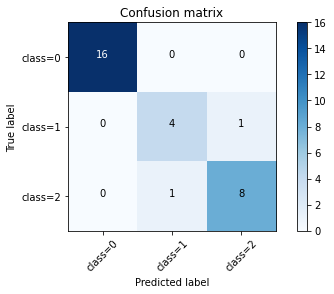

In [25]:

cnf_matrix = confusion_matrix(y_test, LogR_pre, labels=[0,1, 2])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['class=0','class=1', 'class=2'],normalize= False,  title='Confusion matrix')

## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.